In [1]:
import numpy as np

from base_rl.train import ParallelTrainer, OnlineTrainer
from base_rl.callbacks import SaveBestPolicy, SavePolicyOnTrainingEnd
import matplotlib.pyplot as plt
from q_learning.algorithm import QLearningAlgo, QLPolicy
from envs.env_creator import env_creator
from base_rl.eval_policy import EvalDiscreteStatePolicy
from base_rl.scheduler import DecayingExpScheduler, LinearScheduler, DecayingExpContinuousScheduler
import random
from glob import glob
import pandas as pd

In [2]:
plt.rcParams["figure.figsize"] = [20, 12]

In [3]:

device = 'cuda'
steps_per_episode = 1000
model_names = ['model_h_c', 'model_final_h', 'model_aeq']
q_policies_path = 'tmp/q_learning'
model_files = {model_name: glob(f'{q_policies_path}/*{model_name}*' ) for model_name in model_names}


Episode 0 Reward: -201.1575742825357 || New State Found: False


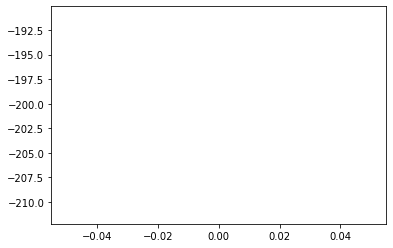

In [ ]:
benchmarks = {}
for model_name,policy_files in model_files.items():
    for policy_file in policy_files:
        eval_policy = QLPolicy.load(policy_file)
        env_kwargs = {'steps_per_episode': steps_per_episode, 'device': device,
                      'model_path': f'tmp/state_quantization/{model_name}'}
        evaluator = EvalDiscreteStatePolicy(policy=eval_policy, env_creator=env_creator, env_kwargs=env_kwargs)
        evaluator.evaluate(epochs=2)
        benchmark = {policy_file.split('/')[-1].split('.')[0]: {'reward': np.mean(evaluator.eval_rewards_per_epoch), 'std':np.std(evaluator.eval_rewards_per_epoch)}}
        benchmarks.update({policy_file: {'reward': np.mean(evaluator.eval_rewards_per_epoch), 'std':np.std(evaluator.eval_rewards_per_epoch)}})

In [ ]:
#df = pd.concat({k: pd.DataFrame(v).T for k, v in benchmarks.items()}, axis=0)
df = pd.DataFrame(benchmarks).T
df